In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df0 = pd.read_csv("hf://datasets/daniilak/Russia_Real_Estate_2018_2021/data.csv")
df0_shuffeled = df0.sample(n=len(df0), random_state=1)

'HTTPSConnectionPool(host='cdn-lfs.hf.co', port=443): Read timed out.' thrown while requesting GET https://huggingface.co/datasets/daniilak/Russia_Real_Estate_2018_2021/resolve/main/data.csv
Retrying in 1s [Retry 1/5].
'HTTPSConnectionPool(host='cdn-lfs.hf.co', port=443): Read timed out.' thrown while requesting GET https://huggingface.co/datasets/daniilak/Russia_Real_Estate_2018_2021/resolve/main/data.csv
Retrying in 1s [Retry 1/5].
'HTTPSConnectionPool(host='cdn-lfs.hf.co', port=443): Read timed out.' thrown while requesting GET https://huggingface.co/datasets/daniilak/Russia_Real_Estate_2018_2021/resolve/main/data.csv
Retrying in 1s [Retry 1/5].
'HTTPSConnectionPool(host='cdn-lfs.hf.co', port=443): Read timed out.' thrown while requesting GET https://huggingface.co/datasets/daniilak/Russia_Real_Estate_2018_2021/resolve/main/data.csv
Retrying in 1s [Retry 1/5].
'HTTPSConnectionPool(host='cdn-lfs.hf.co', port=443): Read timed out.' thrown while requesting GET https://huggingface.co/da

In [4]:
df0_shuffeled.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
4682889,6700000,2020-11-08,08:00:31,55.823007,37.751551,3,1,3,5,1,31.00,5.5,1
4486064,3800000,2020-10-01,04:38:39,50.575581,36.562892,5952,3,1,9,4,91.00,11.0,1
3895469,1740000,2020-06-15,10:54:48,56.128080,40.408438,5789,3,6,12,1,37.80,10.7,11
4747381,2450000,2020-11-23,17:23:40,59.956203,30.406696,2661,3,4,12,2,70.00,10.0,1
2175247,2050000,2019-07-09,16:19:47,55.017212,83.003930,9654,1,6,10,1,48.94,14.0,1


In [5]:
df1 = df0_shuffeled.iloc[:50000] 
df1.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
4682889,6700000,2020-11-08,08:00:31,55.823007,37.751551,3,1,3,5,1,31.00,5.5,1
4486064,3800000,2020-10-01,04:38:39,50.575581,36.562892,5952,3,1,9,4,91.00,11.0,1
3895469,1740000,2020-06-15,10:54:48,56.128080,40.408438,5789,3,6,12,1,37.80,10.7,11
4747381,2450000,2020-11-23,17:23:40,59.956203,30.406696,2661,3,4,12,2,70.00,10.0,1
2175247,2050000,2019-07-09,16:19:47,55.017212,83.003930,9654,1,6,10,1,48.94,14.0,1


<Axes: xlabel='geo_lat', ylabel='geo_lon'>

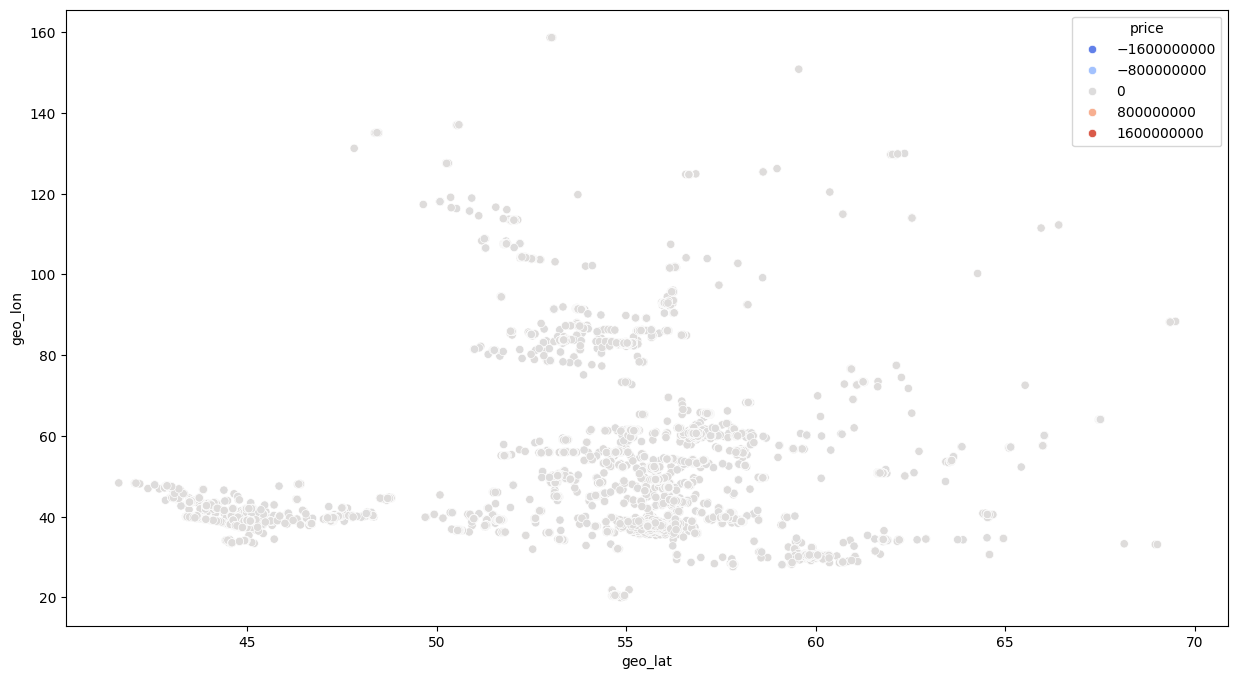

In [6]:
plt.figure(figsize=(15,8))
sns.scatterplot(x= 'geo_lat', y='geo_lon', data= df1, hue='price', palette='coolwarm')

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

df0 = pd.read_csv("hf://datasets/daniilak/Russia_Real_Estate_2018_2021/data.csv")
df0_shuffeled = df0.sample(n=len(df0), random_state=1)
df1 = df0_shuffeled.iloc[:50000] 

X = df1.drop(columns=["price"])
y = df1["price"]

numerical_features = ['geo_lat', 'geo_lon', 'level', 'levels', 'rooms', 'area', 'kitchen_area']
categorical_features = ['region', 'building_type', 'object_type']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler())                 
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore'))    
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

X = preprocessor.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X.shape[1],)),  
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dense(64, activation='relu'),   
    tf.keras.layers.Dense(1) 
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")

predictions = model.predict(X_test)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 783003609464832.0000 - mae: 4779448.5000 - val_loss: 56090330923008.0000 - val_mae: 4311870.5000
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 597936689905664.0000 - mae: 4431687.5000 - val_loss: 50345522757632.0000 - val_mae: 3808610.2500
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 404620715229184.0000 - mae: 3709977.5000 - val_loss: 41845123973120.0000 - val_mae: 2932937.0000
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 487375306227712.0000 - mae: 2866814.5000 - val_loss: 34631252443136.0000 - val_mae: 2150953.2500
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 581732986257408.0000 - mae: 2333235.5000 - val_loss: 30893940932608.0000 - val_mae: 1896571.5000
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 339977799991296.0000 - mae: 2009318.5000 - val_loss: 28887822106624.0000 - val_mae: 1882315.7500
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2

In [8]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X.shape[1],)),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)  # Linear activation for regression
])
model.compile(optimizer=Adam(learning_rate=1e-3), loss=Huber(), metrics=['mae'])
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                    epochs=100, batch_size=64, callbacks=[early_stopping])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 5044712.0000 - mae: 5044713.0000 - val_loss: 4407723.0000 - val_mae: 4407723.0000
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4679659.5000 - mae: 4679660.5000 - val_loss: 4339352.0000 - val_mae: 4339352.5000
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4703581.0000 - mae: 4703582.0000 - val_loss: 4176478.5000 - val_mae: 4176479.5000
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4214699.0000 - mae: 4214699.0000 - val_loss: 3882726.5000 - val_mae: 3882727.7500
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4124817.0000 - mae: 4124817.5000 - val_loss: 3482253.0000 - val_mae: 3482253.2500
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3649337.0000 - mae: 3649337.5000 - val_loss: 3028457.5000 - val_mae: 3028457.5000
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3162508.5000 - mae: 3162509.0000 - val_loss: 2590784.0000 - val_mae: 2590784.5000

In [12]:
df1 = df1[(df1['price'] > df1['price'].quantile(0.01)) & (df1['price'] < df1['price'].quantile(0.99))]
df1['price'] = np.log1p(df1['price'])
predictions = np.expm1(predictions)
df1['region_density'] = df1.groupby('region')['region'].transform('count')
df1['kitchen_ratio'] = df1['kitchen_area'] / df1['area']
#df1['kitchen_ratio'].fillna(0, inplace=True)  # Remplacez les valeurs NaN

from tensorflow.keras.layers import Add

input_layer = tf.keras.layers.Input(shape=(X.shape[1],))
dense1 = Dense(256, activation='relu')(input_layer)
dense2 = Dense(256, activation='relu')(dense1)
skip_connection = Add()([dense1, dense2])  # Résidu
output_layer = Dense(1)(skip_connection)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
#model.compile(optimizer=Adam(learning_rate=1e-3), loss=Huber(), metrics=['mae'])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3), loss=Huber(), metrics=['mae'])
Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))


<Dense name=dense_21, built=False>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from tensorflow.keras.callbacks import EarlyStopping

df0 = pd.read_csv("hf://datasets/daniilak/Russia_Real_Estate_2018_2021/data.csv")
df0_shuffled = df0.sample(n=len(df0), random_state=1)
df1 = df0_shuffled.iloc[:50000] 
df1 = df1[(df1['price'] > df1['price'].quantile(0.01)) & (df1['price'] < df1['price'].quantile(0.99))]
df1['price'] = np.log1p(df1['price'])
df1['region_density'] = df1.groupby('region')['region'].transform('count')
df1['kitchen_ratio'] = df1['kitchen_area'] / df1['area']
df1['kitchen_ratio'].fillna(0, inplace=True)
X = df1.drop(columns=["price"])
y = df1["price"]
numerical_features = ['geo_lat', 'geo_lon', 'level', 'levels', 'rooms', 'area', 'kitchen_area', 'region_density', 'kitchen_ratio']
categorical_features = ['region', 'building_type', 'object_type']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler())                 
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore'))    
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])
X = preprocessor.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

input_layer = Input(shape=(X.shape[1],))
dense1 = Dense(256, activation='relu')(input_layer)
batch1 = BatchNormalization()(dense1)
dropout1 = Dropout(0.3)(batch1)

dense2 = Dense(256, activation='relu')(dropout1)
batch2 = BatchNormalization()(dense2)
dropout2 = Dropout(0.3)(batch2)

skip_connection = Add()([dense1, dropout2])

dense3 = Dense(128, activation='relu')(skip_connection)
batch3 = BatchNormalization()(dense3)
dropout3 = Dropout(0.3)(batch3)

output_layer = Dense(1)(dropout3)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer=Adam(learning_rate=1e-3), loss=Huber(), metrics=['mae'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping]
)
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")
predictions = model.predict(X_test)
predictions = np.expm1(predictions)

C:\Users\souma\AppData\Local\Temp\ipykernel_3940\135202946.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['kitchen_ratio'].fillna(0, inplace=True)


Epoch 1/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 9.2511 - mae: 9.7374 - val_loss: 0.1998 - val_mae: 0.5110
Epoch 2/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.1054 - mae: 1.5275 - val_loss: 0.0916 - val_mae: 0.3178
Epoch 3/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.7166 - mae: 1.1104 - val_loss: 0.0856 - val_mae: 0.3204
Epoch 4/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.5745 - mae: 0.9524 - val_loss: 0.0682 - val_mae: 0.2794
Epoch 5/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.5086 - mae: 0.8824 - val_loss: 0.0525 - val_mae: 0.2464
Epoch 6/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.4477 - mae: 0.8156 - val_loss: 0.0541 - val_mae: 0.2525
Epoch 7/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.4270 - mae: 0.7946 - val_loss: 0.0534 - val_mae: 0.2503
Epoch 8/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.4009 - mae: 0.7619 - val_loss: 0.0531 - val_mae: 0.2470
Epoch 9/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import MeanSquaredError

df0 = pd.read_csv("hf://datasets/daniilak/Russia_Real_Estate_2018_2021/data.csv")
df0_shuffled = df0.sample(n=len(df0), random_state=1)
df1 = df0_shuffled.iloc[:50000]
df1 = df1[(df1['price'] > df1['price'].quantile(0.01)) & (df1['price'] < df1['price'].quantile(0.99))]
df1['price'] = np.log1p(df1['price'])
df1['region_density'] = df1.groupby('region')['region'].transform('count')
df1['kitchen_ratio'] = df1['kitchen_area'] / df1['area']
df1['kitchen_ratio'].fillna(0, inplace=True)
X = df1.drop(columns=["price"])
y = df1["price"]
numerical_features = ['geo_lat', 'geo_lon', 'level', 'levels', 'rooms', 'area', 'kitchen_area', 'region_density', 'kitchen_ratio']
categorical_features = ['region', 'building_type', 'object_type']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])
X = preprocessor.fit_transform(X)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

def regression_accuracy(y_true, y_pred, margin=0.1):
    """
    Accuracy for regression: percentage of predictions within a margin of the true value.
    """
    correct = tf.abs(y_pred - y_true) < margin * tf.abs(y_true)
    return tf.reduce_mean(tf.cast(correct, tf.float32))
input_layer = Input(shape=(X.shape[1],))
dense1 = Dense(512, activation='relu')(input_layer)
batch1 = BatchNormalization()(dense1)
dropout1 = Dropout(0.3)(batch1)
dense2 = Dense(512, activation='relu')(dropout1)
batch2 = BatchNormalization()(dense2)
dropout2 = Dropout(0.3)(batch2)
skip_connection = Add()([dense1, dropout2])
dense3 = Dense(256, activation='relu')(skip_connection)
batch3 = BatchNormalization()(dense3)
dropout3 = Dropout(0.3)(batch3)
dense4 = Dense(128, activation='relu')(dropout3)
batch4 = BatchNormalization()(dense4)
dropout4 = Dropout(0.3)(batch4)
output_layer = Dense(1)(dropout4)
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss=MeanSquaredError(),
    metrics=['mae', regression_accuracy]
)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr]
)
test_loss, test_mae, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}, Test Accuracy: {test_accuracy:.05%}")
predictions = model.predict(X_test)
predictions = np.expm1(predictions)


C:\Users\souma\AppData\Local\Temp\ipykernel_13632\1893791582.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['kitchen_ratio'].fillna(0, inplace=True)


Epoch 1/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 131.1448 - mae: 10.2773 - regression_accuracy: 0.0806 - val_loss: 0.4947 - val_mae: 0.5324 - val_regression_accuracy: 0.9818 - learning_rate: 0.0010
Epoch 2/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 5.1483 - mae: 1.7642 - regression_accuracy: 0.5200 - val_loss: 0.3018 - val_mae: 0.4409 - val_regression_accuracy: 0.9957 - learning_rate: 0.0010
Epoch 3/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 3.1752 - mae: 1.3821 - regression_accuracy: 0.6296 - val_loss: 0.1930 - val_mae: 0.3440 - val_regression_accuracy: 0.9994 - learning_rate: 0.0010
Epoch 4/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 2.2325 - mae: 1.1618 - regression_accuracy: 0.7061 - val_loss: 0.1396 - val_mae: 0.2939 - val_regression_accuracy: 0.9988 - learning_rate: 0.0010
Epoch 5/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 1.6218 - mae: 0.9975 - regression_accuracy: 0.7715 - val_loss: 0.1075 - val_mae: 0.2514 - val_regressi